# A preliminary analysis on Twitter data in the #METOO movement

This notebook demonstrates a preliminary analysis on tweets with the hashtag "#METOO". Tweets posted from 8th to 18th March 2018 were collected.  

Basicially, this notebook shows:

1. How to extract and sperate information, such as the URL, mentions (@), tweets, username, and metadata (posting data), from tweets collected.

2. How to preprocess the twitter text, such as tokenizing the text in to lists of word. 

3. Some basic stats including the number of sentence per tweet, number of tokens (word) per tweet, the average number of sentence per day, and the average of tweet tokens per day. Visualizations on the stats are provided to give a straigtforward understanding of the data.

4. What are the most popular hashtags except "#Metoo" during the selected period.

5. What does the trend of a specific hashtag look like during the selected period.

To have a better understanding of the data, the sentiment analysis and topic extraction can be conducted and added to this notebook. The retweet network is also worth to examined to explore the information flow during the selected period.

In [94]:
# Importing more generic libraries
import glob
import os
import math
import csv
import ast
from collections import Counter

# Importing data structure libraries
import pandas as pd
import numpy as np

# Import graphing tools
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure that any graphs produced appears in the notebook
%matplotlib inline

# Import text analysist tools
import re
import nltk
from nltk.tokenize import RegexpTokenizer

In [34]:
import csv

# open raw data and seperate data in to days
with open('metoofile.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter='|')
    for row in readCSV:
        if row[1]=='2018-03-19':
            with open('0319.csv','a') as f:
                wr = csv.writer(f,dialect = 'excel')
                wr.writerow(row)
        if row[1]=='2018-03-18':
            with open('0318.csv','a') as f:
                wr = csv.writer(f,dialect = 'excel')
                wr.writerow(row)
        if row[1]=='2018-03-17':
            with open('0317.csv','a') as f:
                wr = csv.writer(f,dialect = 'excel')
                wr.writerow(row)
        if row[1]=='2018-03-16':
            with open('0316.csv','a') as f:
                wr = csv.writer(f,dialect = 'excel')
                wr.writerow(row)
        if row[1]=='2018-03-15':
            with open('0315.csv','a') as f:
                wr = csv.writer(f,dialect = 'excel')
                wr.writerow(row)
        if row[1]=='2018-03-14':
            with open('0314.csv','a') as f:
                wr = csv.writer(f,dialect = 'excel')
                wr.writerow(row)
        if row[1]=='2018-03-13':
            with open('0313.csv','a') as f:
                wr = csv.writer(f,dialect = 'excel')
                wr.writerow(row)
        if row[1]=='2018-03-12':
            with open('0312.csv','a') as f:
                wr = csv.writer(f,dialect = 'excel')
                wr.writerow(row)
        if row[1]=='2018-03-11':
            with open('0311.csv','a') as f:
                wr = csv.writer(f,dialect = 'excel')
                wr.writerow(row)
        if row[1]=='2018-03-10':
            with open('0310.csv','a') as f:
                wr = csv.writer(f,dialect = 'excel')
                wr.writerow(row)
        if row[1]=='2018-03-09':
            with open('0309.csv','a') as f:
                wr = csv.writer(f,dialect = 'excel')
                wr.writerow(row)
        if row[1]=='2018-03-08':
            with open('0308.csv','a') as f:
                wr = csv.writer(f,dialect = 'excel')
                wr.writerow(row)
        if row[1]=='2018-03-07':
            with open('0307.csv','a') as f:
                wr = csv.writer(f,dialect = 'excel')
                wr.writerow(row)
      

In [6]:
# Loading multiple files in a path
# This is used when all the files that you want to load are all together in a folder
# Parameters:
# path           = Path to the folder
# colSelect      = Which columns in the CSV files would you like to load
# colNames       = The names of the columns that you have selected before
# need_convert   = Check to see if we need to convert list object
# column_convert = Which columns do you need to convert
def loading_multiple_file_path(path, colSelect, colNames, need_convert=None, column_convert=None):
    
    # Load all the files
    allFiles = glob.glob(path + "/*.csv")

    # Holds all the tweets
    dataframe = pd.DataFrame()

    # Holds the individual date tweets
    dataframe= []

    # Debugs to ensure the code is working
    print("Begin reading .csv in " + path + "....\n")
    
    # Check to see if some columns need to be converted back into a list object 
    if need_convert:
        
        # Create the function to convert to a list
        string_to_list = lambda x: ast.literal_eval(str(x))

        # Create the converter that will convert all the columns we tell it to back to a list object
        conv = {}
        for entry in column_convert:
            conv[entry] = string_to_list
        
        # Read every file
        for file_ in allFiles:

            # Debugs to ensure the code is working
            print("Reading and Converting file: " + str(file_) + "....")
            df = pd.read_csv(file_,  skiprows=1, usecols=colSelect, names=colNames)

            dataframe.append(df)
    else:
        # Read every file
        for file_ in allFiles:

            # Debugs to ensure the code is working
            print("Reading file: " + str(file_) + "....")
            df = read_frame
            df = pd.read_csv(file_,  skiprows=1, usecols=colSelect, names=colNames)

            dataframe.append(df)
    
    # Debugs to ensure the code is running
    print("\nFinished reading all files in " + path + "\n")
    
    print("Merge all individual file dataframes together into a single dataframe...\n")
    dataframe = pd.concat(dataframe)
    
    print("Finished merging all the files into a single dataframe.\n" )
    
    return dataframe

# Save the dataframe into a file
# Parameters:
# data_frame_name = Name of the dataframe to save
# name_of_file    = The name of the file you want to save it as
def save_frame(data_frame_name, name_of_file):
    
    print("Begin saving dataframe into a csv.\n")
    
    name = name_of_file + ".csv"
    # Save the dataframe
    data_frame_name.to_csv(name, sep=',', encoding='utf-8')
    
    print("Finish and saved into " + name + "\n")

# Loads the dataframe from a single file. By default it skips the 1st column (this is usually the index) 
# Parameters:
# csv_file_name   = Name of the file to load
# length          = The amount of columns to load (take the amount of columns + 1)
# custom          = If you want to load in a selective column amount turn true
# colList         = Which columns you want to load
# colNames        = The names of the columns that you want to load
def read_frame(csv_file_name, length=None, custom= False, colList = None, colNames = None):
    print("Reading csv " + csv_file_name)
    name = csv_file_name + ".csv"
    
    # Load csv by specifying which ones you want 
    if custom:
        return_frame = pd.read_csv(name,  usecols = colList)
    # Load csv by length skipping the first one (index)
    else: 
        return_frame = pd.read_csv(name,  usecols = range(1,length))
    print("Finish reading " + csv_file_name + "\n")
    return return_frame

# Similar to the one before except this converts the list present in the csv back into list objects to be used
# Parameters:
# csv_file_name   = Name of the file to load
# columnNames     = The names of the columns that you want to load
# length          = The amount of columns to load (take the amount of columns + 1)
# custom          = If you want to load in a selective column amount turn true
# colList         = Which columns you want to load
def read_frame_convert_list (csv_file_name, columnNames, length=None, custom= False, colList = None):
    
    # Create the function to convert to a list
    string_to_list = lambda x: ast.literal_eval(str(x))

    # Create the converter that will convert all the columns we tell it to back to a list object
    conv = {}
    
    # Assign the converter for each column to convert
    for entry in columnNames:
        conv[entry] = string_to_list
    
    print("Reading csv " + csv_file_name)
    name = csv_file_name + ".csv"

    # Load a specified amount of columns from the csv
    if custom:
        return_frame = pd.read_csv(name,  usecols = colList,  converters=conv)
    
    # Load the csv based on length
    else: 
        return_frame = pd.read_csv(name,  usecols = range(1,length),  converters=conv)
    print("Finish reading " + csv_file_name + "\n")
    
    return return_frame

In [8]:
# Extract the links from a text
def extract_links(dataframe):
    
    # Regrex to extract all the links
    urls = re.findall(r"http\S+", dataframe['text'])
    
    # Replace the link with the placeholder @LINK
    dataframe['text'] = re.sub(r"http\S+", "@LINK", dataframe['text'])
    
    # Insert the URL into their own column
    if not urls:
        dataframe["URL"] = []
    else: 
        dataframe["URL"] = urls
    return dataframe
    
    
# Extract tweeter mentions in a text
def extract_mentions(dataframe):
    
    # Regrex to extract all the mentions
    mention = re.findall(r"@([A-Za-z0-9_]+)", dataframe['text'])
    
    # Replace the mention with the placeholder @MENTION
    dataframe['text'] = re.sub(r"@([A-Za-z0-9_]+)", "@MENTION", dataframe['text'])
    
    # Insert the mention into their own column
    if not mention:
        dataframe["MENTION"] = []
    else: 
        dataframe["MENTION"] = mention
    return dataframe

# Changes the date the declared format   
def format_date(dataframe, column_name, time_format):
    
    print("Start formatting date ")
    
    # Convert the time to date-time object
    dataframe[column_name] = pd.to_datetime(dataframe[column_name])
    
    # Convert the time to the desired format
    dataframe[column_name] = dataframe[column_name].apply(lambda x: x.strftime(time_format))  
    
    print("Finish formatting date \n") 
    
    return dataframe

In [20]:
# Start inital setup
MasterTweetFrame = loading_multiple_file_path("./Tweets", [1,4,5], ["time_stamp","screen_name", "text"])

print("Start extracting Mentions\n")

# Extract the mentions
MasterTweetFrame = MasterTweetFrame.apply(extract_mentions, axis=1)

print("End extracting Mentions\n")
print("Start extracting URL\n")

# Extract the URLS
MasterTweetFrame = MasterTweetFrame.apply(extract_links, axis=1)

print("End Extracting URL\n")

# Format the date to use have year, month, day
MasterTweetFrame = format_date(MasterTweetFrame, "time_stamp", "%Y-%m-%d")

Begin reading .csv in ./Tweets....

Reading file: ./Tweets/0308.csv....
Reading file: ./Tweets/0309.csv....
Reading file: ./Tweets/0310.csv....
Reading file: ./Tweets/0311.csv....
Reading file: ./Tweets/0312.csv....
Reading file: ./Tweets/0313.csv....
Reading file: ./Tweets/0314.csv....
Reading file: ./Tweets/0315.csv....
Reading file: ./Tweets/0316.csv....
Reading file: ./Tweets/0317.csv....
Reading file: ./Tweets/0318.csv....

Finished reading all files in ./Tweets

Merge all individual file dataframes together into a single dataframe...

Finished merging all the files into a single dataframe.

Start extracting Mentions

End extracting Mentions

Start extracting URL

End Extracting URL

Start formatting date 
Finish formatting date 



In [45]:
# first 5 entries of MasterTweetFrame
MasterTweetFrame[:5]

,time_stamp,screen_name,text,MENTION,URL
0,2018-03-08,ConsueloRomeroL,"Basta #violenza sulle #donne! Unisciti a noi, ...",[],[https://act.wemove.eu/campaigns/diritti-delle...
1,2018-03-08,MissWakeUp,"Guys this is so suspicious, there's too many d...",[],[]
2,2018-03-08,DennisKulpa,#MeToo @LINK …,[],[https://twitter.com/PatriciaLRiver5/status/97...
3,2018-03-08,mymiddle_metoo,@LINK …가해자의 실태입니다.#미투운동 #미투 #MeToo #withyou #...,[],[https://www.facebook.com/permalink.php?story_...
4,2018-03-08,futurofemenino,#TodosLosDiasSon8DeMarzo #futuroenfemenino #Ti...,[],[]


# Graphing Functions

Now that we have done some basic analysis of the tweet text. It is time to create some functions that help us graph the results. Here we declare 2 extra parameter to save the graph if needed. These do not have to be used. There will be example of both chooisng to save the graph created or not choosing to.

## Note: 
The titles are hard coded for the example dataset used. In order to change it simply change the line with "fig.suptitle" with a new title.

In [89]:
# Plot a column value over time 
# Parameters:
# column        = Columns to be used for the data
# date          = The index with the dates
# dataframe     = The dataframe of the data
# intervalValue = Set intervals for date, larger the number the bigger the interval between date stamp on graph
# saveImage     = True to save image, false to skip
# fileName      = Name of the save file
def basic_plot_generator(column, date, dataframe, saveImage=False, fileName = None):
    # Plot how many tweets there are over the whole duration
    fig,ax = plt.subplots()

    # Set title for the graph
    fig.suptitle("#metoo Movement " + column + " Over Time", fontsize="x-large")

    # Create subplot of Tweet Count over time using a the default 1 month interval
    ax.plot(pd.to_datetime(date), dataframe[column], label=column)

    
    # Set the date format
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    fig.autofmt_xdate()
    
    # Calculate the average
    countMean = [dataframe[column].mean()]*len(pd.to_datetime(date))
    mean_line = ax.plot(pd.to_datetime(date),countMean, label='Average Overall Count', linestyle='--')

    # Create a legend for the subplot
    legend = ax.legend(loc='upper center', shadow=True)
    
    # Saving the Plot as an Image
    if saveImage:
        fig.savefig(fileName)
    
    # Show Plot
    plt.show()

# Plot different columns against eachother over time
# Parameters:
# column        = Columns to be used for the data
# date          = The index with the dates
# dataframe     = The dataframe of the data
# intervalValue = Set intervals for date, larger the number the bigger the interval between date stamp on graph
# saveImage     = True to save image, false to skip
# fileName      = Name of the save file
def plot_compare_generator(column, date, dataframe, saveImage=False, fileName = None):
    
    # Plot how many tweets there are over the whole duration
    fig,ax = plt.subplots()

    # Generate Title
    title = "Comparing #metoo Movement Sentiements: "

    # Add all columns to the title
    for element in column:
        title = title + " " + element 
    
    title = title + " Over time"
    
    # Set title for the graph
    fig.suptitle(title, fontsize="x-large")
    
    for element in column:
        # Create subplot of Tweet Count over time using a 3 month interval
        ax.plot(pd.to_datetime(date), dataframe[element], label=element)
        
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    fig.autofmt_xdate()
    
    # Create a legend for the subplot
    legend = ax.legend(loc='upper center', shadow=True)
    
    # Saving the Plot as an Image
    if saveImage:
        fig.savefig(fileName)
    
    # Show Plot
    plt.show()

# Advance Analysis Helper Function

In order to conduct different types of text analysis we are going break up the text into 'tokens'. This just refers to separate each word in a tweet. Therefore we are going to create a new dataframe that contained tokened sentences (separate via sentences) and words (separated by word) and their respective token count. This is done using nltk library.

In [50]:
# Calculate sentence length
def tokenize_text(dataframe):
    # Calculate number of sentences
    sentence = nltk.sent_tokenize(dataframe["text"]) 
    dataframe['sentence'] = sentence
    dataframe['num_sentence'] = len(sentence)
    
    # Calculate length of sentences
    sentence_length = []
    tokens = []
    for line in sentence:
        
        # Set tokenizer to reconize words + the shorthand @MENTION and @LINK
        tokenizer = RegexpTokenizer(r'\w+|@[A-Za-z0-9_-]*')
        words = tokenizer.tokenize(line)
        
        # Add the amount of tokens to the list 
        tokens = tokens + words
        sentence_length.append(len(words))

    # Calculate average sentence length
    dataframe['average_sentence_length'] = math.ceil(sum(sentence_length)/len(sentence_length))
        
    # Save Tokenized text
    dataframe['tokens'] = tokens
    
    # Save Token Count
    dataframe['count_tokens'] = len(tokens)
    
    return dataframe

# Advance Analysis Segmentation

Given that some dataset can be very large and the amount of time it takes to run an algorthmn over such as large dataset. It is important to have the ability to break larger dataset into smaller chuncks. Although this does not neccessarily speed up the process, it allows us to insert debugs to track our progress. In addition, it also allows us to restart from a segement if there is a crash rather than restart from the beginning. 

At this time we are also going to save completed chunks into their own csv. This is to ensure our progress is not lost. We can load them all back in because we have a function that can read multiple files from a file that was created at the start of the notebook. 

## Note: 
This function below allows the user to select which alogrithm to use. Therefore if there exist an algorithm that is not in this notebook, you can easily add it in. All that is needed is to add another condition in the for loop with a new algorithm and another number to represent it.

Some of the algorithms will make more sense/explained later on in the notebook

In [51]:
# Section off the tweets into smaller chuncks and save it into csv
# Parameters:
# size            = The size of each segement of the data (if given the total size of the dataframe, it will be 1 file)
# Frame           = The dataframe to look at
# Filename        = The name of the csv (a numbering will be attached to the end of the name)
# algorithm       = The algorithm that is being chosen
# savedirectory   = The folder name to save the csv
def create_save_section(size, Frame, Filename, algorithm, savedirectory):
    
    # Create the file directory if it does not exist
    if not os.path.exists(savedirectory):
        os.makedirs(savedirectory)
    
    # Divide the dataframe into smaller chunk to work with
    # Set size of each chunk
    n = size

    #Create a list of the frame section
    FrameList = [Frame[i:i+n] for i in range(0,Frame.shape[0],n)]
    
    # Iterate through each section in the list
    for section in range(0,len(FrameList)):
        
        # Use the corresponding algorithm
        # if you want to add a new one this is where it is done
        if algorithm == 1:
            # Print debug and tokenize the text
            print("Looking at section: " + str(section+1))
            newFrame = FrameList[section].apply(tokenize_text, axis=1)
            print("Finish looking at section: " + str(section+1))
        
        if algorithm == 2:
            # Print debug and extract hashtag from dataframe
            print("Looking at section: " + str(section+1))
            newFrame = FrameList[section].apply(extract_hashtag, axis=1)
            print("Finish looking at section: " + str(section+1))
            
        if algorithm == 3:
            # Print debug and update the dictionary of categories
            print("Looking at section: " + str(section+1))
            newFrame = FrameList[section].apply(update_values_category, axis=1)
            print("Finish looking at section: " + str(section+1))
        
        # Create the name of the save location based on file and directory
        saveLocation = "./" + savedirectory + "/" + Filename 
        
        # Print debug and save the section into a csv
        print("Saving the section: " + str(section+1) + " into csv")
        newFrame.to_csv(saveLocation + "_" + str(section+1) + ".csv", sep=',', encoding='utf-8')
        print("Finish saving into " + saveLocation + "_" + str(section+1) + ".csv")
    
    print("Finised saving all the files into " + saveLocation)

# Generating Segmented Tokenized Tweets

We now move onto the next segment of the notebook about how to tokenize tweets. In the section we are again going to create a new dataframe to hold all this information. To begin we will copy over some columns from MasterTweetFrame.

Afterwards we will move onto tokenizing the tweets based on words and sentences. T Depending on the size of the dataset, the reason for support both methods is due to the fact that, depending on your needs, both aspect may be important. However depending on the amount of text in the corpus his may take a large amount of time. Therefore we will be conducting this tokenization in parts using the function "create_save_section" made eariler.

## Note:
The helper function "create_save_section" does not return us a dataframe to use, it merely just saves it. Therefore we will need to load the files back in.

In [52]:
# Copy the columns we want into new dataframe
TokenTweetFrame = MasterTweetFrame[['time_stamp','text']].copy()

# Tokenize and Save the Tweets (each section has 10000 entries) 
# 1 refers to algorithm 1 in the create_save_frame (to tokenize text)
# def create_save_section(size, Frame, Filename, algorithm, savedirectory)
create_save_section(10000, TokenTweetFrame, "TokenTweet", 1, "Tweets_Tokenize")

# Loading the csvs into a dataframe
# Since all the csv are located in "Tweets_Tokenize we can just load from there
# def loading_multiple_file_path(path, colSelect, colNames, need_convert=None, column_convert=None):
TokenTweetFrame = loading_multiple_file_path("./Tweets_Tokenize", [1,2,3,4,5,6,7], ["time_stamp","text","sentence","num_sentence","average_sentence_length","tokens","count_tokens"])

Looking at section: 1
Finish looking at section: 1
Saving the section: 1 into csv
Finish saving into ./Tweets_Tokenize/TokenTweet_1.csv
Looking at section: 2
Finish looking at section: 2
Saving the section: 2 into csv
Finish saving into ./Tweets_Tokenize/TokenTweet_2.csv
Looking at section: 3
Finish looking at section: 3
Saving the section: 3 into csv
Finish saving into ./Tweets_Tokenize/TokenTweet_3.csv
Looking at section: 4
Finish looking at section: 4
Saving the section: 4 into csv
Finish saving into ./Tweets_Tokenize/TokenTweet_4.csv
Looking at section: 5
Finish looking at section: 5
Saving the section: 5 into csv
Finish saving into ./Tweets_Tokenize/TokenTweet_5.csv
Looking at section: 6
Finish looking at section: 6
Saving the section: 6 into csv
Finish saving into ./Tweets_Tokenize/TokenTweet_6.csv
Looking at section: 7
Finish looking at section: 7
Saving the section: 7 into csv
Finish saving into ./Tweets_Tokenize/TokenTweet_7.csv
Looking at section: 8
Finish looking at section:

# Examining TokenTweetsFrame

Now that we have the TokenTweets dataframe loaded back into the dataframe. We will a look at the dataframe itself as well as some properties of it.

In [53]:
# Look at the first 5 entries of TokenTweet
TokenTweetFrame[:5]

,time_stamp,text,sentence,num_sentence,average_sentence_length,tokens,count_tokens
0,2018-03-08,"Basta #violenza sulle #donne! Unisciti a noi, ...","['Basta #violenza sulle #donne!', 'Unisciti a ...",4,6,"['Basta', 'violenza', 'sulle', 'donne', 'Unisc...",22
1,2018-03-08,"Guys this is so suspicious, there's too many d...","[""Guys this is so suspicious, there's too many...",2,14,"['Guys', 'this', 'is', 'so', 'suspicious', 'th...",27
2,2018-03-08,#MeToo @LINK …,['#MeToo @LINK\xa0…'],1,2,"['MeToo', '@LINK']",2
3,2018-03-08,@LINK …가해자의 실태입니다.#미투운동 #미투 #MeToo #withyou #...,[' @LINK\xa0…가해자의 실태입니다.#미투운동 #미투 #MeToo #with...,1,12,"['@LINK', '가해자의', '실태입니다', '미투운동', '미투', 'MeTo...",12
4,2018-03-08,#TodosLosDiasSon8DeMarzo #futuroenfemenino #Ti...,['#TodosLosDiasSon8DeMarzo #futuroenfemenino #...,1,8,"['TodosLosDiasSon8DeMarzo', 'futuroenfemenino'...",8


In [54]:
# Find out how many unique exist in the dataset
print("There is an average of " + str(TokenTweetFrame["num_sentence"].mean()) + " sentences in the dataset")
print("The overall average sentence length per tweet is " + str(TokenTweetFrame["average_sentence_length"].mean()))

There is an average of 1.8366853615891003 sentences in the dataset
The overall average sentence length per tweet is 13.729818560522821


# Calculating Overall Averages

Although we have number of sentences and average sentence length for each tweet, we might want the average of these statistic for each day. Therefore we are going to create a new dataframe with these values to use. We will also include in this new dataframe the number of words in the tweets

In [56]:
# Convert the column time_stamp back to an index
TokenTweetFrame = TokenTweetFrame.set_index("time_stamp")

# Resort the index (This is because we read from Mulitple Files)
TokenTweetFrame.sort_index(inplace=True)

# Calculate average on num_sentence, averaege_sentence_length and group by time_stamp
TokenGraphFrame = TokenTweetFrame[['num_sentence','average_sentence_length','count_tokens']].copy()

# Calculate average per day and save them into their own dataframe for graphing
TokenGraphFrame = TokenGraphFrame[['num_sentence','average_sentence_length','count_tokens']].groupby(["time_stamp"]).mean()

# See what the first 5 entry look likes of token graph
TokenGraphFrame[:5]

,num_sentence,average_sentence_length,count_tokens
time_stamp,,,
2018-03-08,1.900680,13.968061,22.839596
2018-03-09,1.735287,14.327949,21.276727
2018-03-10,1.754291,13.784971,21.079335
2018-03-11,1.802450,13.209490,21.063111
2018-03-12,1.797849,13.778381,21.474250


# Graphing TokenTweetFrame

Now we are going to graph both the number of tweets and the average sentence length over time. Before we can accomplish this we need to set the time_stamp column back to being an index.

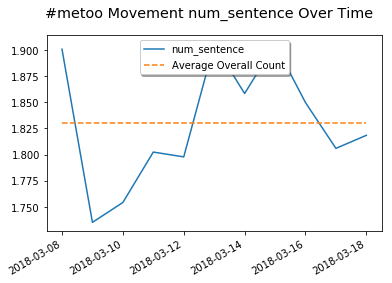

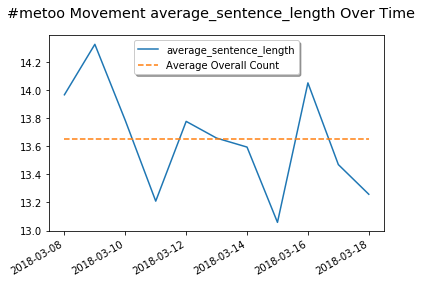

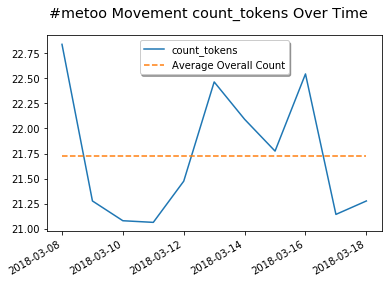

In [88]:
# Using the graph function we made we will plot these averages
for columns in TokenGraphFrame[["num_sentence", "average_sentence_length","count_tokens"]]:
    basic_plot_generator(columns, TokenGraphFrame.index, TokenGraphFrame)

# Basic Characteristic of Tweets

With a complete list of all the tweets formatted and saved into a dataframe (MasterTweetFrame), it is time to look at some characteristics of it.

In [22]:
# Find out how many unique exist in the dataset for each type
print("There are " + str(len(MasterTweetFrame.time_stamp)) + " tweets recorded in the dataset")
print("There are " + str(len(MasterTweetFrame.time_stamp.unique())) + " days recorded in the dataset")
print("There are " + str(len(MasterTweetFrame.screen_name.unique())) + " usernames in the dataset")

There are 104663 tweets recorded in the dataset
There are 11 days recorded in the dataset
There are 66079 usernames in the dataset


# Examining HASHTAGS

We will now move onto examining HASHTAGS. Before we can begin we are going to define a function that helps us extract hashtags from the tokenized text.

## Note: 
In this notebook we are removing the "#metoo" from analysis. This is because all tweets gathered had this hashtag, therefore we want to know all the other hashtags used and how many there were of them. This includes removing duplicates of the "metoo" hashtag.  

In addition it is important to recall that all hashtags are stored in capital letters

In [102]:
# Extract out the hashtags and count how many there are
def extract_hashtag(dataframe):
    
    # Finds all the hashtags with regrex and capitalize them with ".upper()"
    hashtag = re.findall(r"#(\w+)", dataframe["text"].upper())

    # Remove all instances GAMERGATE hashtag (since all tweets has it) This includes duplicates
    # If you would like to keep them comment out the while loop
    # If you would like to remove a different hashtag you can copy the following two lines and change the word
    # Remember all tokens are capitalized
    while "METOO" in hashtag:
        hashtag.remove("METOO")

    # Insert hashtag and count into dataframe
    if hashtag:
        dataframe['HASHTAG'] = hashtag
        dataframe['count_hashtag'] = len(hashtag)
    else:
        dataframe['HASHTAG'] = []
        dataframe['count_hashtag'] = 0
        
    return dataframe

# Extracting Hashtag and Gathering Statistics

Before we begin we are yet again going to copy over parts of MasterTweetFrame into a new dataframe. Afterwards we will extract the hashtag from it, however depending on the dataset this may take a while. Therefore it is safer to do the calculation in parts (again we will use create_save_section to do so). 

## Note: 
All hashtags are recorded in capitals. This is to simplify some aspects for analysis later on when we examine the occurance of each hashtag.

In [103]:
# Create new dataframe with information we need from MasterTweetFrame
HashtagStatisticFrame = MasterTweetFrame[['time_stamp','text']].copy()

# Create sections using the extract hashtag
create_save_section(10000,HashtagStatisticFrame , "HashtagStatistic", 2, "Hashtag_Stat")

# Load back the csv (Note the files are saved in a folder)
HashtagStatisticFrame = loading_multiple_file_path("./Hashtag_Stat", [1,2,3,4], ["time_stamp","text","HASHTAG","count_hashtag"])

# Convert the column time_stamp to an index
HashtagStatisticFrame = HashtagStatisticFrame.set_index("time_stamp")

Looking at section: 1
Finish looking at section: 1
Saving the section: 1 into csv
Finish saving into ./Hashtag_Stat/HashtagStatistic_1.csv
Looking at section: 2
Finish looking at section: 2
Saving the section: 2 into csv
Finish saving into ./Hashtag_Stat/HashtagStatistic_2.csv
Looking at section: 3
Finish looking at section: 3
Saving the section: 3 into csv
Finish saving into ./Hashtag_Stat/HashtagStatistic_3.csv
Looking at section: 4
Finish looking at section: 4
Saving the section: 4 into csv
Finish saving into ./Hashtag_Stat/HashtagStatistic_4.csv
Looking at section: 5
Finish looking at section: 5
Saving the section: 5 into csv
Finish saving into ./Hashtag_Stat/HashtagStatistic_5.csv
Looking at section: 6
Finish looking at section: 6
Saving the section: 6 into csv
Finish saving into ./Hashtag_Stat/HashtagStatistic_6.csv
Looking at section: 7
Finish looking at section: 7
Saving the section: 7 into csv
Finish saving into ./Hashtag_Stat/HashtagStatistic_7.csv
Looking at section: 8
Finis

# Plotting Hashtag Graph

Simialr to before, we are going to graph some results.

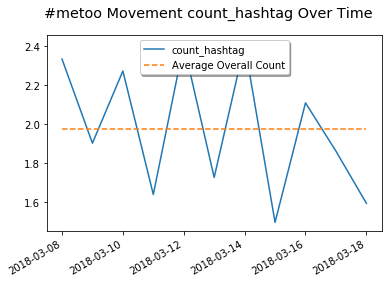

In [104]:
# Using the graph function we made we will plot these averages
HashtagGraphFrame = HashtagStatisticFrame.groupby(["time_stamp"]).mean()

for columns in HashtagGraphFrame[["count_hashtag"]]:
    basic_plot_generator(columns, HashtagGraphFrame.index, HashtagGraphFrame)

# Popular Hashtag 

We now are going to move onto examining popular hashtags. To do so we fight are going to define a simple function that can get us the occurance of a particular hashtag.

In [105]:
# Helper function that calculates what hashtag appear the most
def get_max_word(dataframe):
    
    # Calculates what is most popular
    popular = max(set(dataframe["HASHTAG"]), key=dataframe["HASHTAG"].count)
    
    # Assigns the values
    dataframe["most_popular"] = popular
    
    return dataframe


In [119]:
# Helper function that calculates what the top 10 popular hashtags
def get_top10_word(dataframe):
    
    # sort hashtags from high to low
    top10 = sorted(set(dataframe["HASHTAG"]), key=dataframe["HASHTAG"].count,reverse=True)[:10]
    
    dataframe["top10 hashtags"] = top10
    
    return dataframe
    

# Most Popular Hashtag

Now that we have the hashtags in a dataframe, let's create a dateframe that looks into how popular a particular hashtag is. This is done by first collapsing the dates together and combining the hashtag list. Afterwards count how many of each hashtag are there. However getting the occurrence of a hashtag for each tweet does not provide a lot of useful information, therefore we will collapse the tweets by date and get the most popular ones by date

## Note:

It is important to know that during this process we save and load back the dataframe after we made a copy of it. The reason for this is because HashtagStatisticFrame column "HASHTAG" are stored in a "string" that so happens to look like a python "list". Therefore we need the dataframe to re-evaluate this column to be a "list" and not a "string". One method to do so is to use the functioned created called "read_frame_convert_list" which would 1. reads the file (which the data of HashtagStatisticFrame is stored as) and 2. read the "HASHTAG" column as a "list". 


In [106]:
# Create a new dataframe with just HASHTAG and count
HashtagPopularFrame = HashtagStatisticFrame[["HASHTAG","count_hashtag"]].copy()

# Unset time_stamp to save
HashtagPopularFrame = HashtagPopularFrame.reset_index()

# Save Frame
save_frame(HashtagPopularFrame, "HashtagPopularFrame")

# Load back the Frame except run it under the covnerter to get a list not object
HashtagPopularFrame = read_frame_convert_list("HashtagPopularFrame", ["HASHTAG"], length = 4)

# Reset index back to date
HashtagPopularFrame = HashtagPopularFrame.set_index("time_stamp")

# Collapsing the dataframe Hashtags and Count
HashtagPopularFrame = HashtagPopularFrame[["HASHTAG","count_hashtag"]].groupby('time_stamp').agg({'HASHTAG': 'sum', 'count_hashtag': 'sum'})

# See what the first 5 results looks like
HashtagPopularFrame[:5]

Begin saving dataframe into a csv.

Finish and saved into HashtagPopularFrame.csv

Reading csv HashtagPopularFrame
Finish reading HashtagPopularFrame



,HASHTAG,count_hashtag
time_stamp,,
2018-03-08,"[VIOLENZA, DONNE, CONVENZIONEDIINSTANBUL, 미투운동...",45942
2018-03-09,"[TIMESUP, อำนาจล, ศาลพระภ, เส, เส, ท, BLACKPAN...",23427
2018-03-10,"[39, 狛江, セクハラ, WETOO, AHEDTAMIMI, WITHYOU, OSC...",16808
2018-03-11,"[TIMESUP, PERVERTINCHIEF, PERVERT, SEXUALHARAS...",10569
2018-03-12,"[KINDLESCOUT, ASMSG, IARTG, AMREADING, BOOKBOO...",21253


# Finding the Most Popular Hashtag

Before we look into the most popular Hashtag we can collapse all the HASHTAGS in one date together and get the count. Then afterwards find the most popular hashtag in each date and see how it does over the whole period.

In [108]:
# Now lets save the top most popular word by day into their own column
HashtagPopularFrame = HashtagPopularFrame.apply(lambda x: get_max_word(x), axis = 1)


# Print out the 11 entry
HashtagPopularFrame

,HASHTAG,count_hashtag,most_popular
time_stamp,,,
2018-03-08,"[VIOLENZA, DONNE, CONVENZIONEDIINSTANBUL, 미투운동...",45942,TIMESUP
2018-03-09,"[TIMESUP, อำนาจล, ศาลพระภ, เส, เส, ท, BLACKPAN...",23427,TIMESUP
2018-03-10,"[39, 狛江, セクハラ, WETOO, AHEDTAMIMI, WITHYOU, OSC...",16808,TIMESUP
2018-03-11,"[TIMESUP, PERVERTINCHIEF, PERVERT, SEXUALHARAS...",10569,TIMESUP
2018-03-12,"[KINDLESCOUT, ASMSG, IARTG, AMREADING, BOOKBOO...",21253,TIMESUP
2018-03-13,"[MAGA, BUILDTHEWALL, TRUMP2020LANDSLIDE, RIGHT...",14000,TIMESUP
2018-03-14,"[TIMESUP, AWOMANSWORTH, NOMORE, ENDWOMANABUSE,...",20838,TIMESUP
2018-03-15,"[WOMENSMARCH, WESTANDTOGETHER, ENOUGH, TIMESUP...",13755,TIMESUP
2018-03-16,"[BALANCETONPORC, MOIAUSSI, ASSISES2018, QUESTI...",21480,TIMESUP


In [137]:
# Now lets save the top 10 popular word by day into their own column
HashtagPopularFrame_Top10 = HashtagPopularFrame.apply(lambda x: get_top10_word(x), axis = 1)

HashtagPopularFrame_Top10

,HASHTAG,count_hashtag,most_popular,count_TIMESUP,top10 hashtags
time_stamp,,,,,
2018-03-08,"[VIOLENZA, DONNE, CONVENZIONEDIINSTANBUL, 미투운동...",45942,TIMESUP,2862,"[TIMESUP, INTERNATIONALWOMENSDAY, IWD2018, WOM..."
2018-03-09,"[TIMESUP, อำนาจล, ศาลพระภ, เส, เส, ท, BLACKPAN...",23427,TIMESUP,963,"[TIMESUP, 죽는다고_성범죄가_사라지진_않는다, WITHYOU, INTERNA..."
2018-03-10,"[39, 狛江, セクハラ, WETOO, AHEDTAMIMI, WITHYOU, OSC...",16808,TIMESUP,626,"[TIMESUP, WITHYOU, 강작가_상습성추행_해명해라, 만화계_성폭력_OUT..."
2018-03-11,"[TIMESUP, PERVERTINCHIEF, PERVERT, SEXUALHARAS...",10569,TIMESUP,612,"[TIMESUP, NEVERAGAIN, MAGA, SXSW, WITHYOU, WOM..."
2018-03-12,"[KINDLESCOUT, ASMSG, IARTG, AMREADING, BOOKBOO...",21253,TIMESUP,1132,"[TIMESUP, NEVERAGAIN, MARCHFOROURLIVES, BREAKI..."
2018-03-13,"[MAGA, BUILDTHEWALL, TRUMP2020LANDSLIDE, RIGHT...",14000,TIMESUP,833,"[TIMESUP, NEVERAGAIN, MAGA, TELFORD, RESIST, T..."
2018-03-14,"[TIMESUP, AWOMANSWORTH, NOMORE, ENDWOMANABUSE,...",20838,TIMESUP,924,"[TIMESUP, NEVERAGAIN, MARCHFOROURLIVES, WEDNES..."
2018-03-15,"[WOMENSMARCH, WESTANDTOGETHER, ENOUGH, TIMESUP...",13755,TIMESUP,744,"[TIMESUP, NEVERAGAIN, THERESISTANCE, CSW62, MA..."
2018-03-16,"[BALANCETONPORC, MOIAUSSI, ASSISES2018, QUESTI...",21480,TIMESUP,1100,"[TIMESUP, NEVERAGAIN, MUSIC, FRIDAYFEELING, MA..."


In [139]:

# Let's have a close look at the top 10 hashtags each day
HashtagPopularFrame_Top10['top10 hashtags']

time_stamp
2018-03-08    [TIMESUP, INTERNATIONALWOMENSDAY, IWD2018, WOM...
2018-03-09    [TIMESUP, 죽는다고_성범죄가_사라지진_않는다, WITHYOU, INTERNA...
2018-03-10    [TIMESUP, WITHYOU, 강작가_상습성추행_해명해라, 만화계_성폭력_OUT...
2018-03-11    [TIMESUP, NEVERAGAIN, MAGA, SXSW, WITHYOU, WOM...
2018-03-12    [TIMESUP, NEVERAGAIN, MARCHFOROURLIVES, BREAKI...
2018-03-13    [TIMESUP, NEVERAGAIN, MAGA, TELFORD, RESIST, T...
2018-03-14    [TIMESUP, NEVERAGAIN, MARCHFOROURLIVES, WEDNES...
2018-03-15    [TIMESUP, NEVERAGAIN, THERESISTANCE, CSW62, MA...
2018-03-16    [TIMESUP, NEVERAGAIN, MUSIC, FRIDAYFEELING, MA...
2018-03-17    [TIMESUP, NEVERAGAIN, STPATRICKSDAY, MARCHFORO...
2018-03-18    [TIMESUP, NEVERAGAIN, THERESISTANCE, TRUMPRUSS...
Name: top10 hashtags, dtype: object

# CheckPoint Save and Load (HashtagPopularFrame)

This is just to save the work currently done into its own file. 

## Note:
Another reason for creating a save point here is because in the next section we will looking at occurance of hashtags. This involves editing this dataframe, therefore having a "blank" dataframe to be reused is useful.

In [109]:
# Reset Index
HashtagPopularFrame = HashtagPopularFrame.reset_index()

# Save Frame
save_frame(HashtagPopularFrame, "HashtagPopularFrame")

# Load back the Frame except run it under the covnerter to get a list not object
HashtagPopularFrame = read_frame_convert_list("HashtagPopularFrame", ["HASHTAG"], length = 5)

# Set Index
HashtagPopularFrame = HashtagPopularFrame.set_index("time_stamp")

Begin saving dataframe into a csv.

Finish and saved into HashtagPopularFrame.csv

Reading csv HashtagPopularFrame
Finish reading HashtagPopularFrame



In [122]:
# Reset Index
HashtagPopularFrame_Top10 = HashtagPopularFrame_Top10.reset_index()

# Save Frame
save_frame(HashtagPopularFrame_Top10, "HashtagPopularFrame_top10")

# Load back the Frame except run it under the covnerter to get a list not object
HashtagPopularFrame_Top10 = read_frame_convert_list("HashtagPopularFrame_top10", ["HASHTAG"], length = 5)

# Set Index
HashtagPopularFrame_Top10 = HashtagPopularFrame_Top10.set_index("time_stamp")

Begin saving dataframe into a csv.

Finish and saved into HashtagPopularFrame_top10.csv

Reading csv HashtagPopularFrame_top10
Finish reading HashtagPopularFrame_top10



# Occurance of Hashtag

Using the information gathered from HashtagPopularFrame we can see that "TIMESUP" seems to be a popular hashtag. Therefore lets see how popular it was over time, this is done by counting its occurance over time. Therefore we are going to need a function that will help us accomplish this.

In [110]:
# Counts the occurance of a word
def countOccurance(dateframe, word):
    # Count the amount of hashtag in the list
    count = Counter(dateframe["HASHTAG"])
    title = "count_" + word
    dateframe[title] = count[word]
    return dateframe

In [112]:
# Acquire count of "TIMESUP"
HashtagPopularFrame = HashtagPopularFrame.apply(lambda x: countOccurance(x, "TIMESUP"), axis = 1)

# Show the count
HashtagPopularFrame

,HASHTAG,count_hashtag,most_popular,count_TIMESUP
time_stamp,,,,
2018-03-08,"[VIOLENZA, DONNE, CONVENZIONEDIINSTANBUL, 미투운동...",45942,TIMESUP,2862
2018-03-09,"[TIMESUP, อำนาจล, ศาลพระภ, เส, เส, ท, BLACKPAN...",23427,TIMESUP,963
2018-03-10,"[39, 狛江, セクハラ, WETOO, AHEDTAMIMI, WITHYOU, OSC...",16808,TIMESUP,626
2018-03-11,"[TIMESUP, PERVERTINCHIEF, PERVERT, SEXUALHARAS...",10569,TIMESUP,612
2018-03-12,"[KINDLESCOUT, ASMSG, IARTG, AMREADING, BOOKBOO...",21253,TIMESUP,1132
2018-03-13,"[MAGA, BUILDTHEWALL, TRUMP2020LANDSLIDE, RIGHT...",14000,TIMESUP,833
2018-03-14,"[TIMESUP, AWOMANSWORTH, NOMORE, ENDWOMANABUSE,...",20838,TIMESUP,924
2018-03-15,"[WOMENSMARCH, WESTANDTOGETHER, ENOUGH, TIMESUP...",13755,TIMESUP,744
2018-03-16,"[BALANCETONPORC, MOIAUSSI, ASSISES2018, QUESTI...",21480,TIMESUP,1100


# Graphing the HASHTAG

Now that we had occurance of "TIMESUP" we are going to graph it over time.

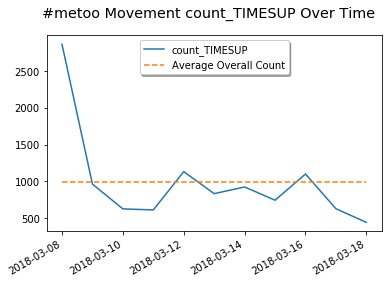

In [114]:
# Using the graph function we made we will plot these averages
for columns in HashtagPopularFrame[["count_TIMESUP"]]:
    # Example of saving the file
    basic_plot_generator(columns, HashtagPopularFrame.index, HashtagPopularFrame, saveImage=True, fileName="count_TIMESUP")